# WeatherPy
----

The objective of this project was to analyze the effect of latitude on the following weather variables: temperature, humidity, cloudiness, and wind speed. Select 500 cities using the Citypy Python library Github repository after ramdomly selecting latitudes and longitudes. After retrieving city names from Citypy, the code retrieves weather data for those locations from the Open Weather API. With this data, some scatter plots were generated using Matplotlib to analyze the correlation between latitude and the other weather variables.

### Analysis
* As expected, there's a correlation between latitude and temperature. The cities with lower latitudes have higher temperatures.
* There's no correlation between Latitude and Humidity, Cloudiness and Wind Speed.
* The ramdom sample has a bias toward cities in the Northern Hemisphere

---

In [1]:
# Import Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
from pprint import pprint
from datetime import date

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = os.path.join("Output","cities.csv")

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# Verify library versions if some error occurs

#pd.__version__ # Pandas version: 0.23.4
#np.__version__ # Numpy version: 1.15.4
#import matplotlib as mat
#mat.__version__ # Matplotlib version: 3.0.2

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Build partial query URL
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={api_key}&q="

# Set up lists to hold reponse info
name = []
cloud = []
country = []
dt =[]
humid = []
lat = []
lng = []
temp = []
wind = []

record = 1
group = 1

# Loop through the list of cities and perform a request for data on each
print("Beginning Data Retrieval")
print("-----------------------------")
for city in cities:
    print(f'Processing Record {record} of set {group} | {city}')
    try:
        response = requests.get(query_url + city).json()
        name.append(response['name'])
        cloud.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        dt.append(response['dt'])
        humid.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        wind.append(response['wind']['speed'])
    except KeyError:
        print('City not found. Skipping...')
    except:
        print('An unexpected error has ocurred, Skipping...')
    # Wait 65 seconds after record #50
    # API allows just 60 requests per minute
    if record == 50:
        time.sleep(65)
        record = 1
        group += 1
    record += 1
    # Breaks the loop after it retrieves 500 cities
    if len(name) == 500:
        break
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of set 1 | longonjo
Processing Record 2 of set 1 | alyangula
Processing Record 3 of set 1 | hithadhoo
Processing Record 4 of set 1 | upernavik
Processing Record 5 of set 1 | suarez
Processing Record 6 of set 1 | tual
Processing Record 7 of set 1 | tshikapa
Processing Record 8 of set 1 | kui buri
Processing Record 9 of set 1 | taolanaro
City not found. Skipping...
Processing Record 10 of set 1 | sao joao da barra
Processing Record 11 of set 1 | abu dhabi
Processing Record 12 of set 1 | dikson
Processing Record 13 of set 1 | punta arenas
Processing Record 14 of set 1 | atuona
Processing Record 15 of set 1 | saskylakh
Processing Record 16 of set 1 | airai
Processing Record 17 of set 1 | tazovskiy
Processing Record 18 of set 1 | florianopolis
Processing Record 19 of set 1 | san pedro
Processing Record 20 of set 1 | davila
Processing Record 21 of set 1 | byron bay
Processing Record 22 of set 1 | jamestown
Processing 

Processing Record 42 of set 4 | awjilah
Processing Record 43 of set 4 | kavieng
Processing Record 44 of set 4 | richards bay
Processing Record 45 of set 4 | shache
Processing Record 46 of set 4 | gorgan
Processing Record 47 of set 4 | sao geraldo do araguaia
Processing Record 48 of set 4 | taloqan
Processing Record 49 of set 4 | karamea
City not found. Skipping...
Processing Record 50 of set 4 | kemptville
Processing Record 2 of set 5 | mackay
Processing Record 3 of set 5 | tiksi
Processing Record 4 of set 5 | yulara
Processing Record 5 of set 5 | poum
Processing Record 6 of set 5 | norman wells
Processing Record 7 of set 5 | dubrovnik
Processing Record 8 of set 5 | longyearbyen
Processing Record 9 of set 5 | katoro
Processing Record 10 of set 5 | hovd
Processing Record 11 of set 5 | karlskoga
Processing Record 12 of set 5 | saleaula
City not found. Skipping...
Processing Record 13 of set 5 | cairns
Processing Record 14 of set 5 | yellowknife
Processing Record 15 of set 5 | pochutla
Pr

Processing Record 29 of set 8 | nizhneyansk
City not found. Skipping...
Processing Record 30 of set 8 | scalloway
City not found. Skipping...
Processing Record 31 of set 8 | geeste
Processing Record 32 of set 8 | puerto escondido
Processing Record 33 of set 8 | launceston
Processing Record 34 of set 8 | katsuura
Processing Record 35 of set 8 | salinopolis
Processing Record 36 of set 8 | fairbanks
Processing Record 37 of set 8 | yambio
City not found. Skipping...
Processing Record 38 of set 8 | bodden town
Processing Record 39 of set 8 | voi
Processing Record 40 of set 8 | jishu
Processing Record 41 of set 8 | casablanca
Processing Record 42 of set 8 | vostok
Processing Record 43 of set 8 | bedesa
Processing Record 44 of set 8 | bac lieu
City not found. Skipping...
Processing Record 45 of set 8 | walvis bay
Processing Record 46 of set 8 | mwinilunga
Processing Record 47 of set 8 | atambua
Processing Record 48 of set 8 | puerto madryn
Processing Record 49 of set 8 | kamenskoye
City not f

Processing Record 13 of set 12 | tabiauea
City not found. Skipping...
Processing Record 14 of set 12 | marsabit
Processing Record 15 of set 12 | clearlake
Processing Record 16 of set 12 | totma
Processing Record 17 of set 12 | payakumbuh
Processing Record 18 of set 12 | sinnamary
Processing Record 19 of set 12 | inderborskiy
City not found. Skipping...
Processing Record 20 of set 12 | grants
Processing Record 21 of set 12 | pangnirtung
Processing Record 22 of set 12 | singaparna
Processing Record 23 of set 12 | chalisgaon
Processing Record 24 of set 12 | chifeng
Processing Record 25 of set 12 | gat
Processing Record 26 of set 12 | lumeje
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create a data frame with weather information
weather_dict = {
    "City": name,
    "Cloudiness": cloud,
    "Country": country,
    "Date": dt,
    "Humidity": humid,
    "Latitude": lat,
    "Longitude": lng,
    "Max Temp": temp,
    "Wind Speed": wind
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Longonjo,40,AO,1552996800,45,-12.91,15.25,301.150,3.10
1,Alyangula,12,AU,1552996800,88,-13.85,136.42,299.150,3.76
2,Hithadhoo,0,MV,1553001332,100,-0.60,73.08,302.171,1.31
3,Upernavik,20,GL,1553001332,100,72.79,-56.15,248.471,7.11
4,Suarez,75,CO,1552996800,100,4.05,-74.83,293.150,1.50


In [6]:
# Display number of cities in the DataFrame
weather_data.count()

City          500
Cloudiness    500
Country       500
Date          500
Humidity      500
Latitude      500
Longitude     500
Max Temp      500
Wind Speed    500
dtype: int64

In [7]:
# Save weather information in a file
weather_data.to_csv(output_data_file)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

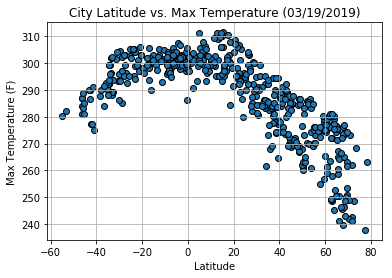

In [8]:
# Build scatter plot
plt.scatter(weather_data["Latitude"], weather_data["Max Temp"], marker="o",edgecolors = 'black')

dt = "{:%m/%d/%Y}".format(date.today())

# Graph properties
plt.title(f"City Latitude vs. Max Temperature ({dt})")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
output_file = os.path.join("Output","Latitude_x_MaxTemp")
plt.savefig(output_file)

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

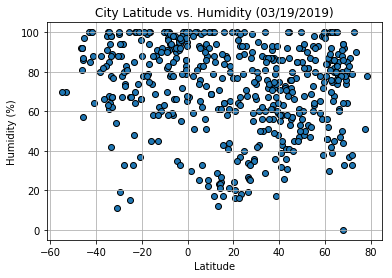

In [9]:
# Build scatter plot
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], marker="o",edgecolors = 'black')

dt = "{:%m/%d/%Y}".format(date.today())

# Graph properties
plt.title(f"City Latitude vs. Humidity ({dt})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
output_file = os.path.join("Output","Latitude_x_Humidity")
plt.savefig(output_file)

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

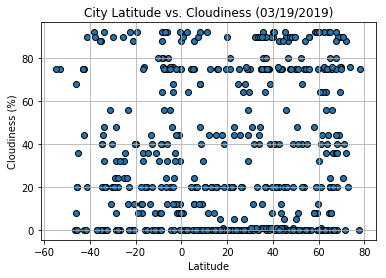

In [10]:
# Build scatter plot
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], marker="o",edgecolors = 'black')

dt = "{:%m/%d/%Y}".format(date.today())

# Graph properties
plt.title(f"City Latitude vs. Cloudiness ({dt})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
output_file = os.path.join("Output","Latitude_x_Cloudiness")
plt.savefig(output_file)

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

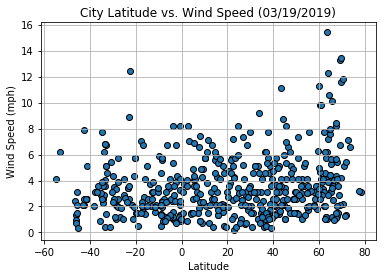

In [11]:
# Build scatter plot
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"], marker="o",edgecolors = 'black')

dt = "{:%m/%d/%Y}".format(date.today())

# Graph properties
plt.title(f"City Latitude vs. Wind Speed ({dt})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
output_file = os.path.join("Output","Latitude_x_WindSpeed")
plt.savefig(output_file)

# Show plot
plt.show()

In [23]:
# Count how many cities by Hemisphere
print(f"South Hemisphere City Count: {weather_data[weather_data['Latitude'] < 0]['City'].count()}")
print(f"North Hemisphere City Count: {weather_data[weather_data['Latitude'] > 0]['City'].count()}")

South Hemisphere City Count: 162
North Hemisphere City Count: 338
